In [0]:
# 그래프에서 한글표현을 위해 폰트를 설치합니다.
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum > /dev/null

In [0]:
from sklearn.datasets import make_moons
import pandas as pd

In [0]:
# 데이터 불러오기
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [0]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [0]:
test.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,15035,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
1,15036,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
2,15037,20140512T000000,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
3,15038,20150415T000000,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
4,15039,20150312T000000,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [0]:
train.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [0]:
test.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [0]:
# 데이터 행열 확인
print(train.shape)
print(test.shape)

(15035, 21)
(6468, 20)


In [0]:
# 결측치 확인
print(train.isnull().sum())
print("-"*20)
print(test.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
--------------------
id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [0]:
X_all = train.drop(['price'], axis=1)
y = train['price']

In [0]:
sel = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']

X = X_all[sel]
y = train['price']

In [0]:
# 데이터 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    random_state=42)

In [0]:
# 모델 만들기
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
forest = RandomForestRegressor(n_estimators=5, random_state=2)

In [0]:
# 모델 학습
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
                      oob_score=False, random_state=2, verbose=0,
                      warm_start=False)

In [0]:
print(forest.estimators_)

[DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1872583848, splitter='best'), DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=794921487, splitter='best'), DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_f

In [0]:
# 변수의 중요도
print(forest.feature_importances_)

[0.03934276 0.07187087 0.6741707  0.21461568]


In [0]:
sum(forest.feature_importances_)

1.0

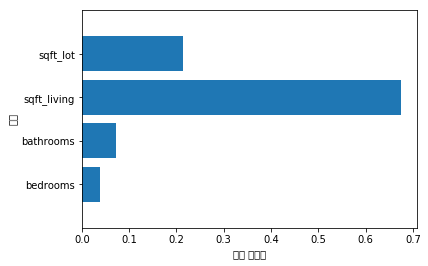

In [0]:
# 변수의 중요도 그래프 찍기
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances_cancer(model, dataset):
 n_features = dataset.shape[1]
 plt.barh(range(n_features), model.feature_importances_, align='center')
 plt.yticks(np.arange(n_features), dataset.columns)
 plt.xlabel("특성 중요도")
 plt.ylabel("특성")
 plt.ylim(-1, n_features)

plot_feature_importances_cancer(forest, X)

## 실습
모델 50개 만들어 보기

In [0]:
# 모델 만들기
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
forest20 = RandomForestRegressor(n_estimators=20, random_state=2, max_depth=3)

In [0]:
# 모델 학습
forest20.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=20,
                      n_jobs=None, oob_score=False, random_state=2, verbose=0,
                      warm_start=False)

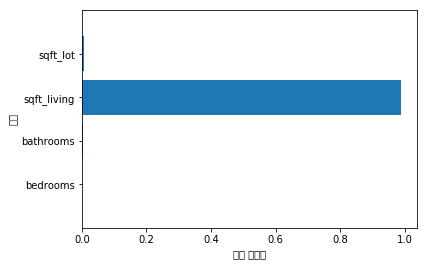

In [0]:
# 변수의 중요도 그래프 찍기
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances_cancer(model, dataset):
 n_features = dataset.shape[1]
 plt.barh(range(n_features), model.feature_importances_, align='center')
 plt.yticks(np.arange(n_features), dataset.columns)
 plt.xlabel("특성 중요도")
 plt.ylabel("특성")
 plt.ylim(-1, n_features)

plot_feature_importances_cancer(forest20, X)

In [0]:
# 20 모델에 대한 평가
cnt = 1
for model in forest20.estimators_:
  model.fit(X_train, y_train)

  if cnt % 5 == 0:
    print("훈련 세트 정확도 : {:.3f}".format(model.score(X_train, y_train)))
    print("테스트 세트 정확도 : {:.3f}".format(model.score(X_test, y_test)))
  cnt += 1

훈련 세트 정확도 : 0.559
테스트 세트 정확도 : 0.432
훈련 세트 정확도 : 0.559
테스트 세트 정확도 : 0.432
훈련 세트 정확도 : 0.559
테스트 세트 정확도 : 0.432
훈련 세트 정확도 : 0.559
테스트 세트 정확도 : 0.432


In [0]:
# 예측
pred = forest.predict(X_test)
pred

array([322990., 338498., 318200., ..., 224600., 450960., 329990.])

,bedrooms,bathrooms,sqft_living,sqft_lot
2021,3,2.50,1480,7200
12670,4,1.50,1920,11595
4359,3,1.50,1410,3600
10556,2,1.00,790,7500
3468,4,2.25,2130,7172
10084,3,1.75,1510,8385
927,3,2.25,1580,6561
11672,4,2.25,2100,7350
5180,3,1.75,1910,8329
9045,3,2.50,2070,8400


In [0]:
sample = pd.read_csv('sample_submission.csv')
sample.head()

,id,price
0,15035,100000
1,15036,100000
2,15037,100000
3,15038,100000
4,15039,100000


In [0]:
print(sample.shape)
print(pred.shape)
print(X_train.shape)

(6468, 2)
(3759,)
(11276, 4)


In [0]:
sample['price']=pred

ValueError: ignored